In [4]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

PCA in python – NOAA Buoys
We’ll be using the data from a NOAA buoy off the coast of California.
Perform PCA on these data to find the maximum possible principal components,
considering the following variables: wave height, dominant wave period, average wave
period, the direction from which the waves at the dominant period are coming, and
sea surface temperature.


Plot PC1 vs PC2.

How many principal components are needed to capture most of the variability
in the dataset?
- Honestly it seems like only 2. PCA1 accounts for ~99% and then PCA2 for 0.5%.

What variables contribute most to the important PCs?

- It looks like dominant wave direction contributes heavily to pc1 and dominant wave period contributes most to pc2.

What does the good or bad performance of a linear dimensionality reduction
method tell you about this dataset? 

- From what I understand, good performance of pca implies that the original data has a good amount of correlation between some/ all of its variables such that fewer features/ principle components can still represent the gist of the original data. I think the pca works pretty well on this data because with 2-3 principle components, pc1 accounts for 99% of the variability. 

In [18]:
# (you get a garbage fit, ie all of them have basically similar value as a principle componentm or you get a 
# good fit where one is way better, so what does it mean if you can get a good or bad linear fit)

In [19]:
# make array of buoy data 
# all data goes into the array since we're not predicting anything rn 

In [20]:
buoy = pd.read_csv('/Users/katherinemottola/Desktop/important/school/GEOL599/3_06_24/buoy.txt', delim_whitespace = True)

In [21]:
cols = ['WVHT','DPD','APD','MWD','WTMP']

buoy = buoy[cols]

buoy.columns = ['Wave Height','Dominant Wave Period','Average Wave Period','Dom Direction','SST']

# using 5 variables so max pcas is 5

In [44]:
buoy

,Wave Height,Dominant Wave Period,Average Wave Period,Dom Direction,SST
0,1.12,12.50,7.69,269,15.3
1,1.16,11.76,7.34,272,15.3
2,1.20,12.50,7.08,268,15.3
3,1.25,10.53,7.33,268,15.4
4,1.27,10.53,7.57,268,15.5
...,...,...,...,...,...
17280,2.01,14.29,11.19,270,16.7
17281,1.75,15.38,10.37,267,16.7
17282,1.79,13.33,10.50,268,16.8
17283,1.66,14.29,10.32,271,16.8


In [75]:
check99 = ['Wave Height','Dominant Wave Period','Average Wave Period','SST']

buoy = buoy[(buoy['Wave Height'] <= 66)]
buoy = buoy[(buoy['Dominant Wave Period'] <= 66)]
buoy = buoy[(buoy['Average Wave Period'] <= 66)]
buoy = buoy[(buoy['SST'] <= 66)]

#then check direction for 999 bc 3 dig
buoy = buoy[buoy['Dom Direction']<=666]

In [97]:
features = ['Wave Height','Dominant Wave Period','Average Wave Period','Dom Direction','SST']

In [77]:
X = buoy[['Wave Height','Dominant Wave Period','Average Wave Period','Dom Direction', 'SST']].copy()
X = X.to_numpy()
X

array([[  1.12,  12.5 ,   7.69, 269.  ,  15.3 ],
       [  1.16,  11.76,   7.34, 272.  ,  15.3 ],
       [  1.2 ,  12.5 ,   7.08, 268.  ,  15.3 ],
       ...,
       [  1.79,  13.33,  10.5 , 268.  ,  16.8 ],
       [  1.66,  14.29,  10.32, 271.  ,  16.8 ],
       [  1.7 ,  12.5 ,  10.54, 271.  ,  16.9 ]])

In [78]:
pca5 = PCA(n_components=5)
pca5.fit(X)
print(pca5.explained_variance_ratio_)

[9.90777521e-01 5.67156404e-03 2.48887556e-03 9.73144741e-04
 8.88946139e-05]


In [79]:
pca4 = PCA(n_components=4)
pca4.fit(X)
print(pca4.explained_variance_ratio_)

[9.90777521e-01 5.67156404e-03 2.48887556e-03 9.73144741e-04]


In [80]:
pca3 = PCA(n_components=3)
pca3.fit(X)
print(pca3.explained_variance_ratio_)

[0.99077752 0.00567156 0.00248888]


In [81]:
print(np.abs(pca3.components_))

[[0.00414966 0.03483275 0.00632252 0.99911854 0.02217264]
 [0.02817253 0.92292703 0.35324348 0.02653793 0.14807698]
 [0.03730158 0.14552072 0.03477188 0.02692689 0.98767311]]


In [90]:
pca2 = PCA(n_components=2)
pca2.fit(X)
print(pca2.explained_variance_ratio_)

[0.99077752 0.00567156]


In [82]:
plotData5 = pca5.transform(X)

In [83]:
plotData5

array([[-3.48462047e+01, -1.88830218e+00,  8.49056649e-01,
         5.17319217e-02, -1.50007507e-01],
       [-3.78672897e+01, -1.16244165e+00,  8.89623549e-01,
        -5.99581235e-02, -8.87557303e-02],
       [-3.38435614e+01, -1.64853953e+00,  9.00178509e-01,
        -4.84736362e-01,  9.07929857e-03],
       ...,
       [-3.38054626e+01, -3.41716798e+00, -7.99025252e-01,
         2.50130397e+00,  2.33069517e-01],
       [-3.67677012e+01, -4.31554546e+00, -1.01809607e+00,
         1.92380578e+00,  1.46676320e-01],
       [-3.68293916e+01, -2.72753885e+00, -8.62539037e-01,
         2.76846855e+00,  1.17076888e-01]])

In [84]:
plotData3 = pca3.transform(X)

In [85]:
plotData3

array([[-34.84620471,  -1.88830218,   0.84905665],
       [-37.86728968,  -1.16244165,   0.88962355],
       [-33.84356141,  -1.64853953,   0.90017851],
       ...,
       [-33.80546258,  -3.41716798,  -0.79902525],
       [-36.76770125,  -4.31554546,  -1.01809607],
       [-36.82939155,  -2.72753885,  -0.86253904]])

In [100]:
pc1 = plotData3[:, 0]
pc2 = plotData3[:, 1]

In [98]:
# components is an attribute lol
components = pca3.components_

# 
num_pc = pca3.n_components_
num_features = X.shape[1]

for pc_idx in range(num_pc):
    print(f"Principal Component {pc_idx + 1}:")
    for feature_idx in range(num_features):
        feature_name = features[feature_idx]
        print(f"Variable: {feature_name}, Contribution: {components[pc_idx, feature_idx]}")
    print()


Principal Component 1:
Variable: Wave Height, Contribution: -0.0041496605221641525
Variable: Dominant Wave Period, Contribution: 0.03483275370277147
Variable: Average Wave Period, Contribution: -0.006322518505972102
Variable: Dom Direction, Contribution: -0.9991185412023922
Variable: SST, Contribution: 0.02217264017608838

Principal Component 2:
Variable: Wave Height, Contribution: -0.028172533786606783
Variable: Dominant Wave Period, Contribution: -0.9229270282455232
Variable: Average Wave Period, Contribution: -0.35324347766392294
Variable: Dom Direction, Contribution: -0.02653792943084376
Variable: SST, Contribution: 0.14807698221989388

Principal Component 3:
Variable: Wave Height, Contribution: 0.03730158163449267
Variable: Dominant Wave Period, Contribution: -0.14552072455572906
Variable: Average Wave Period, Contribution: -0.03477187990282411
Variable: Dom Direction, Contribution: -0.026926885997944676
Variable: SST, Contribution: -0.9876731088324809



In [99]:
np.abs(components)

array([[0.00414966, 0.03483275, 0.00632252, 0.99911854, 0.02217264],
       [0.02817253, 0.92292703, 0.35324348, 0.02653793, 0.14807698],
       [0.03730158, 0.14552072, 0.03477188, 0.02692689, 0.98767311]])

Text(0, 0.5, 'PC2')

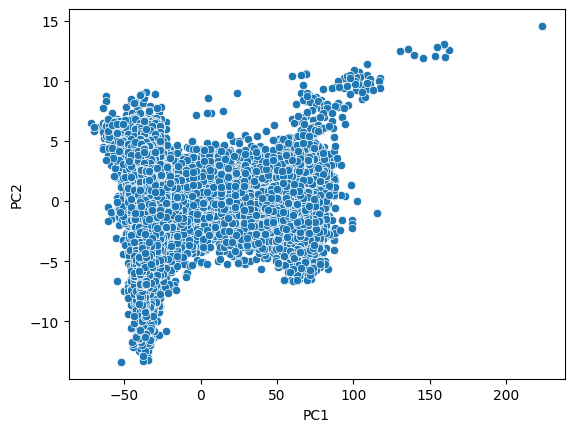

In [101]:
sns.scatterplot(x=pc1, y=pc2)

plt.xlabel('PC1')
plt.ylabel('PC2')